### Imports e leitura

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

df = pd.read_csv("Loan_Default.csv")

df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [3]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [4]:
df["Status"].value_counts()

,count
Status,
0,112031
1,36639


In [5]:
df["default"] = df["Status"]
df["default"].value_counts(normalize=True) * 100

,proportion
default,
0,75.355485
1,24.644515


### Gráficos

#### GRÁFICO 1 — Distribuição de Inadimplência

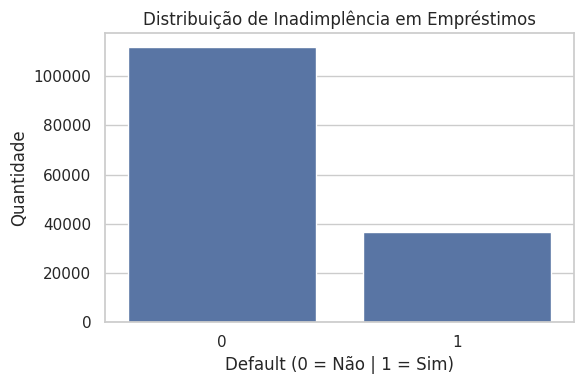

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="default", data=df)
plt.title("Distribuição de Inadimplência em Empréstimos")
plt.xlabel("Default (0 = Não | 1 = Sim)")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

#### GRÁFICO 2 — Score de Crédito × Inadimplência

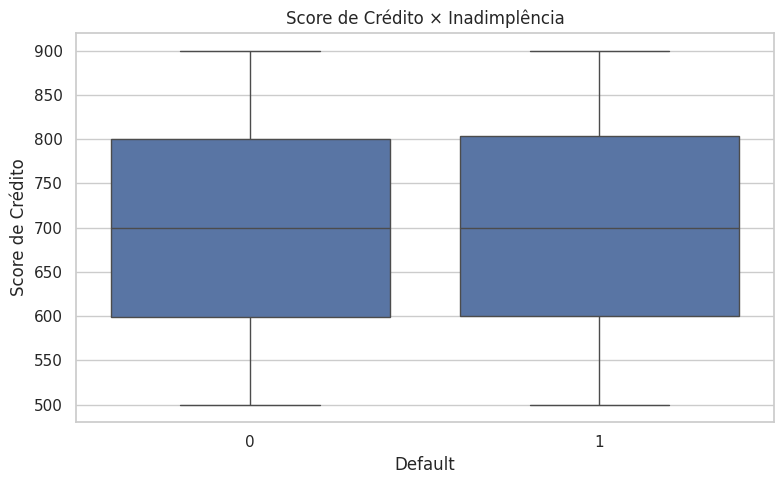

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="default",
    y="Credit_Score"
)
plt.title("Score de Crédito × Inadimplência")
plt.xlabel("Default")
plt.ylabel("Score de Crédito")
plt.tight_layout()
plt.show()

**O que o gráfico mostra**

- Clientes inadimplentes (1) tendem a ter score menor

- Clientes adimplentes (0) concentram scores mais altos
<br>

**Interpretação financeira**

Observa-se que clientes inadimplentes  apresentam, em média, scores de crédito mais baixos, reforçando a relevância do score como indicador de risco, embora não seja determinístico.

#### GRÁFICO 3 — Renda × Inadimplência

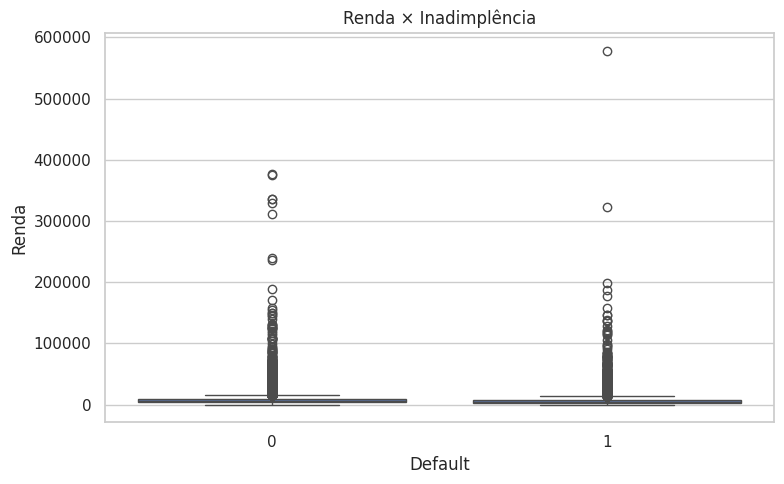

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="default",
    y="income"
)
plt.title("Renda × Inadimplência")
plt.xlabel("Default")
plt.ylabel("Renda")
plt.tight_layout()
plt.show()

#### GRÁFICO 4 — Debt-to-Income Ratio (DTI) × Default

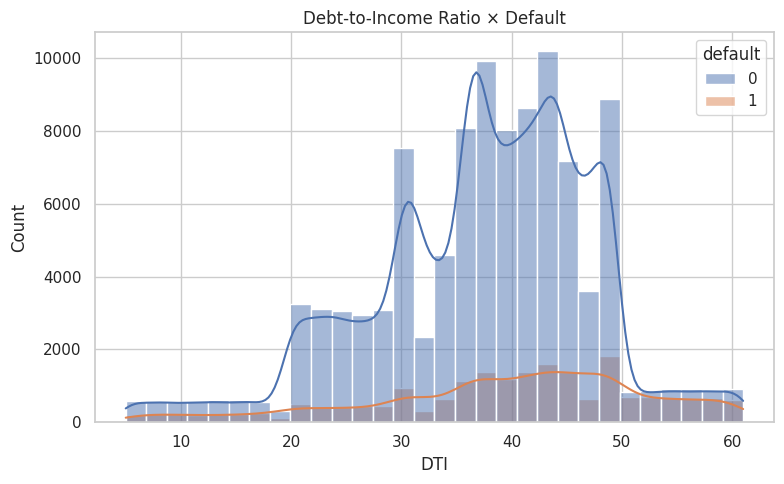

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="dtir1",
    hue="default",
    bins=30,
    kde=True
)
plt.title("Debt-to-Income Ratio × Default")
plt.xlabel("DTI")
plt.tight_layout()
plt.show()

**O que o gráfico mostra**

- Inadimplentes concentram-se em DTI mais altos

- Adimplentes têm DTI mais distribuído

- Há uma clara separação de densidade

<br>

**Interpretação financeira**

Observa-se que clientes com maior Debt-to-Income Ratio apresentam maior propensão à inadimplência, reforçando o DTI como um dos principais indicadores utilizados em análises de crédito.

### Salvando os gráficos

In [10]:
import os
os.makedirs("images", exist_ok=True)

def salvar(nome):
    plt.savefig(f"images/{nome}", dpi=300, bbox_inches="tight")
    plt.close()

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="default", data=df)
plt.title("Distribuição de Inadimplência")
salvar("01_default_distribuicao.png")

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="default",
    y="Credit_Score"
)
plt.title("Score de Crédito × Inadimplência")
plt.xlabel("Default (0 = Não | 1 = Sim)")
plt.ylabel("Score de Crédito")
salvar("02_score_credito_vs_default.png")

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="default",
    y="income",
    showfliers=True
)
plt.title("Renda × Inadimplência")
plt.xlabel("Default (0 = Não | 1 = Sim)")
plt.ylabel("Renda Anual")
salvar("03_renda_vs_default.png")

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x="dtir1",
    hue="default",
    bins=30,
    kde=True,
    stat="count"
)
plt.title("Debt-to-Income Ratio × Inadimplência")
plt.xlabel("DTI")
salvar("04_dti_vs_default.png")